# Project 1 : D.C Crime Analysis

In [1]:
#Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import pandas as pd
import numpy as np
import os
import glob
import csv
import calendar
import seaborn as sns
from scipy.stats import sem
from stats import median

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#### Read the csv files and convert them into DataFrames

In [3]:
# Files to Load
#File for 2019
csv_2019_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2019.csv")
#File for 2018
csv_2018_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2018.csv")
#File for 2017
csv_2017_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2017.csv")
#File for 2016
csv_2016_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2016.csv")
#File for 2015
csv_2015_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2015.csv")
#File for 2014
csv_2014_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2014.csv")
#File for 2013
csv_2013_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2013.csv")
#File for 2012
csv_2012_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2012.csv")
#File for 2011
csv_2011_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2011.csv")
#File for 2010
csv_2010_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2010.csv")
#File for 2009
csv_2009_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2009.csv")

#### Merge all the csv files from 2009-2019 into a single file and a single DataFrame

In [4]:
#Use glob to match the pattern ‘csv’
#Match the pattern (‘csv’) and save the list of file names in the ‘all_files’ variable.
#extension = 'csv'
#Use pandas to concatenate all files in the list and export as CSV. 
#The output file is named “dc_crimes.csv” located in your working directory.
#combine all files in the list
path = '../Project1_DC_Crime_Analysis/Resources/'
all_files = glob.glob(path + "/*.csv")
all_files
row = []

for filename in all_files:
   df = pd.read_csv(filename, index_col=None, header=0)
   row.append(df)

dc_crimes = pd.concat(row, axis=0, ignore_index=True)

#Convert to DataFrame
dc_crimes_df=pd.DataFrame(dc_crimes)
dc_crimes_df.head(2)

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.039673,38.903151,8005297,2009-01-12T10:30:00.000Z,DAY,OTHERS,BURGLARY,1000 - 1099 BLOCK OF CONNECTICUT AVENUE NW,396559.0,137255.0,...,010700 1,10700.0,Precinct 17,38.903143,-77.039670,GOLDEN TRIANGLE,2008-12-28T00:00:00.000Z,NaN,356048194,08005297-01
1,-76.999518,38.904689,162302,2009-11-12T18:00:00.000Z,EVENING,OTHERS,MOTOR VEHICLE THEFT,1100 - 1199 BLOCK OF 5TH STREET NE,400042.0,137425.0,...,010600 2,10600.0,Precinct 83,38.904682,-76.999516,NaN,2009-11-06T12:00:00.000Z,2009-11-12T17:00:00.000Z,356046669,00162302-01


#### Export the combined csv file

In [5]:
#Save the csv of all merged data
dc_crimes_df.to_csv("../dc_crimes_2009_2019.csv",index=False,header=True,encoding='utf-8-sig')

## Data Profiling and Data Cleansing

In [6]:
#Counts - Data Profiling
#Saving a backup copy
dc_crimes_copy=dc_crimes_df.copy()
dc_crimes_df.count()

X                       374403
Y                       374403
CCN                     374403
REPORT_DAT              374403
SHIFT                   374403
METHOD                  374403
OFFENSE                 374403
BLOCK                   374402
XBLOCK                  374403
YBLOCK                  374403
WARD                    374392
ANC                     374403
DISTRICT                374201
PSA                     374173
NEIGHBORHOOD_CLUSTER    369548
BLOCK_GROUP             373335
CENSUS_TRACT            373335
VOTING_PRECINCT         374339
LATITUDE                374403
LONGITUDE               374403
BID                      62208
START_DATE              374393
END_DATE                352236
OBJECTID                374403
OCTO_RECORD_ID          374403
dtype: int64

#### The above result shows us that data set has null values in them

#### As a part of Data Cleanse split the date and time from the columns - START_DATE, REPORT_DAT, END_DATE

In [7]:
#Split the data in START_DATE column to get Date and Time information
dc_crimes_df[['START_DATE','Start_Time']] = dc_crimes_df['START_DATE'].str.split('T',expand=True)
dc_crimes_df[['REPORT_DAT','Report_Time']] = dc_crimes_df['REPORT_DAT'].str.split('T',expand=True)
dc_crimes_df[['END_DATE','End_Time']] = dc_crimes_df['END_DATE'].str.split('T',expand=True)
#Display the data
dc_crimes_df.head(2)

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID,Start_Time,Report_Time,End_Time
0,-77.039673,38.903151,8005297,2009-01-12,DAY,OTHERS,BURGLARY,1000 - 1099 BLOCK OF CONNECTICUT AVENUE NW,396559.0,137255.0,...,38.903143,-77.039670,GOLDEN TRIANGLE,2008-12-28,NaN,356048194,08005297-01,00:00:00.000Z,10:30:00.000Z,NaN
1,-76.999518,38.904689,162302,2009-11-12,EVENING,OTHERS,MOTOR VEHICLE THEFT,1100 - 1199 BLOCK OF 5TH STREET NE,400042.0,137425.0,...,38.904682,-76.999516,NaN,2009-11-06,2009-11-12,356046669,00162302-01,12:00:00.000Z,18:00:00.000Z,17:00:00.000Z


#### The below block of code determines the Day of the week, Name of the month and year for the respective records

In [8]:
#Determine Day of the week and Week number
#Use the to_datetime function of Pandas
dc_crimes_df['START_DATE'] = pd.to_datetime(dc_crimes_df['START_DATE'])
dc_crimes_df['DAY_OF_WEEK'] = dc_crimes_df['START_DATE'].dt.day_name()
dc_crimes_df['WEEK_NUMBER'] = dc_crimes_df['START_DATE'].dt.week


#Splitting the Day, Month and Year to new columns
dc_crimes_df['DAY'] = dc_crimes_df ['START_DATE'].dt.day
dc_crimes_df['MONTH'] = dc_crimes_df['START_DATE'].dt.month
dc_crimes_df['YEAR'] = dc_crimes_df['START_DATE'].dt.year

#The above conversions result in float values - Convert them to integers
dc_crimes_df['WEEK_NUMBER']=dc_crimes_df['WEEK_NUMBER'].fillna(0.0).astype(int)
dc_crimes_df['DAY']=dc_crimes_df['DAY'].fillna(0.0).astype(int)
dc_crimes_df['MONTH']=dc_crimes_df['MONTH'].fillna(0.0).astype(int)
dc_crimes_df['YEAR']=dc_crimes_df['YEAR'].fillna(0.0).astype(int)

dc_crimes_df['MONTH'] = dc_crimes_df['MONTH'].apply(lambda x: calendar.month_abbr[x])

#Display the output
dc_crimes_df[["START_DATE","REPORT_DAT","END_DATE","OFFENSE","DAY_OF_WEEK","WEEK_NUMBER","DAY","MONTH","YEAR"]].head()
#dc_crimes_df.Day.dtype

,START_DATE,REPORT_DAT,END_DATE,OFFENSE,DAY_OF_WEEK,WEEK_NUMBER,DAY,MONTH,YEAR
0,2008-12-28,2009-01-12,NaN,BURGLARY,Sunday,52,28,Dec,2008
1,2009-11-06,2009-11-12,2009-11-12,MOTOR VEHICLE THEFT,Friday,45,6,Nov,2009
2,2009-12-06,2009-12-06,2009-12-06,THEFT F/AUTO,Sunday,49,6,Dec,2009
3,2002-01-26,2009-10-20,2002-01-26,THEFT/OTHER,Saturday,4,26,Jan,2002
4,2005-04-30,2009-10-20,2005-04-30,ASSAULT W/DANGEROUS WEAPON,Saturday,17,30,Apr,2005


#### Update the datatypes for the Date columns

In [9]:
#Converting data types
dc_crimes_df['REPORT_DAT'] = pd.to_datetime(dc_crimes_df['REPORT_DAT'])
dc_crimes_df['START_DATE'] = pd.to_datetime(dc_crimes_df['START_DATE'])
dc_crimes_df['END_DATE'] = pd.to_datetime(dc_crimes_df['END_DATE'], errors='coerce')

In [10]:
dc_crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374403 entries, 0 to 374402
Data columns (total 33 columns):
X                       374403 non-null float64
Y                       374403 non-null float64
CCN                     374403 non-null int64
REPORT_DAT              374403 non-null datetime64[ns]
SHIFT                   374403 non-null object
METHOD                  374403 non-null object
OFFENSE                 374403 non-null object
BLOCK                   374402 non-null object
XBLOCK                  374403 non-null float64
YBLOCK                  374403 non-null float64
WARD                    374392 non-null float64
ANC                     374403 non-null object
DISTRICT                374201 non-null float64
PSA                     374173 non-null float64
NEIGHBORHOOD_CLUSTER    369548 non-null object
BLOCK_GROUP             373335 non-null object
CENSUS_TRACT            373335 non-null float64
VOTING_PRECINCT         374339 non-null object
LATITUDE                3744

#### Drop the columns that are not required for analysis

In [11]:
# Drop the columns that are not required for analysis
dc_crimes_df.drop(['XBLOCK', 'YBLOCK',
                   'X','Y','ANC','BLOCK_GROUP',
                   'CENSUS_TRACT','VOTING_PRECINCT',
                   'BID','OBJECTID','OCTO_RECORD_ID','BID'],axis=1,inplace=True)

#### Re-organize the columns in the DataFrame

In [12]:
#Reorganizing the columns in the DataFrame
dc_crimes_df=dc_crimes_df[["CCN","START_DATE","Start_Time","END_DATE","End_Time",
                           "DAY_OF_WEEK","WEEK_NUMBER","DAY","MONTH","YEAR",
                            "LATITUDE","LONGITUDE","BLOCK","NEIGHBORHOOD_CLUSTER",
                            "METHOD","OFFENSE","PSA",
                            "SHIFT","WARD","DISTRICT",
                            "REPORT_DAT","Report_Time"]]

#### Identify the null values and delete the rows that have null values

In [13]:
#Find the columns that have null values in them - Find the count of null values in a column
dc_crimes_df.isna().sum()

CCN                         0
START_DATE                 10
Start_Time                 10
END_DATE                22168
End_Time                22167
DAY_OF_WEEK                10
WEEK_NUMBER                 0
DAY                         0
MONTH                       0
YEAR                        0
LATITUDE                    0
LONGITUDE                   0
BLOCK                       1
NEIGHBORHOOD_CLUSTER     4855
METHOD                      0
OFFENSE                     0
PSA                       230
SHIFT                       0
WARD                       11
DISTRICT                  202
REPORT_DAT                  0
Report_Time                 0
dtype: int64

### Note: Do not delete the rows which have "END_DATE" has null, because these are genuine open cases under investigation

In [14]:
#Deleting rows that have null values in them - Retain END_DATE ( to analyze open cases if required)
dc_crimes_df = dc_crimes_df.dropna(axis=0, subset=['START_DATE','NEIGHBORHOOD_CLUSTER','BLOCK',
                                                  'PSA','WARD','DISTRICT'])
dc_crimes_df.isna().sum()

CCN                         0
START_DATE                  0
Start_Time                  0
END_DATE                21880
End_Time                21879
DAY_OF_WEEK                 0
WEEK_NUMBER                 0
DAY                         0
MONTH                       0
YEAR                        0
LATITUDE                    0
LONGITUDE                   0
BLOCK                       0
NEIGHBORHOOD_CLUSTER        0
METHOD                      0
OFFENSE                     0
PSA                         0
SHIFT                       0
WARD                        0
DISTRICT                    0
REPORT_DAT                  0
Report_Time                 0
dtype: int64

In [15]:
dc_crimes_df.count()

CCN                     369302
START_DATE              369302
Start_Time              369302
END_DATE                347422
End_Time                347423
DAY_OF_WEEK             369302
WEEK_NUMBER             369302
DAY                     369302
MONTH                   369302
YEAR                    369302
LATITUDE                369302
LONGITUDE               369302
BLOCK                   369302
NEIGHBORHOOD_CLUSTER    369302
METHOD                  369302
OFFENSE                 369302
PSA                     369302
SHIFT                   369302
WARD                    369302
DISTRICT                369302
REPORT_DAT              369302
Report_Time             369302
dtype: int64

## Identify and delete Duplicate records

In [16]:
#Any Duplicate incidents?
dc_crimes_df['Dup_CCN'] = dc_crimes_df.groupby('CCN')['CCN'].transform('size')
dc_crimes_df['Dup_CCN']
dc_crimes_df=dc_crimes_df.sort_values("Dup_CCN",ascending=False)
dc_crimes_df['Dup_CCN']

167478    12
167481    12
167489    12
167488    12
167487    12
167486    12
167485    12
167484    12
167482    12
167483    12
167480    12
167479    12
243255     4
243254     4
243253     4
212762     4
62966      3
366478     3
366479     3
366480     3
31304      3
31303      3
31302      3
62965      3
62964      3
62971      3
96266      3
96265      3
96264      3
62973      3
          ..
125034     1
125033     1
125032     1
125031     1
125030     1
125029     1
125028     1
125047     1
125048     1
125049     1
125060     1
125068     1
125067     1
125066     1
125065     1
125064     1
125063     1
125062     1
125061     1
125059     1
125050     1
125058     1
125057     1
125056     1
125055     1
125054     1
125053     1
125052     1
125051     1
374402     1
Name: Dup_CCN, Length: 369302, dtype: int64

In [17]:
#Delete duplicate Incident Data
dc_crimes_df.drop_duplicates(subset ="CCN",keep = False, inplace = True)
dc_crimes_df['Dup_CCN']
dc_crimes_df.count()

CCN                     369103
START_DATE              369103
Start_Time              369103
END_DATE                347241
End_Time                347242
DAY_OF_WEEK             369103
WEEK_NUMBER             369103
DAY                     369103
MONTH                   369103
YEAR                    369103
LATITUDE                369103
LONGITUDE               369103
BLOCK                   369103
NEIGHBORHOOD_CLUSTER    369103
METHOD                  369103
OFFENSE                 369103
PSA                     369103
SHIFT                   369103
WARD                    369103
DISTRICT                369103
REPORT_DAT              369103
Report_Time             369103
Dup_CCN                 369103
dtype: int64

# Identifying Outliers :Incidents with a start date before 2009 that were reported after 2009

Lower Outliers: [1800 1912 1914 1915 1916]
Upper Outliers: []


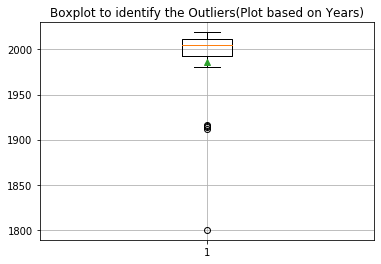

In [18]:
arr_year=dc_crimes_df["YEAR"].unique()
#Find the median
mid=median(arr_year)
mid
#Use numpy to create quartiles
q1=np.percentile(arr_year,25)
q3=np.percentile(arr_year,75)
#Calculate interquartile range
iqr=(q3-q1)
#Finding the boundaries
lower_boundary=q1-(1.5*iqr)
upper_boundary=q3+(1.5*iqr)
#Check for any lower outliers
print("Lower Outliers:", arr_year[arr_year<=lower_boundary])
#Check for any upper outliers
print("Upper Outliers:", arr_year[arr_year>=upper_boundary])

#Creating box plot for outliers
plt.boxplot(arr_year,showmeans=True)
plt.title("Boxplot to identify the Outliers(Plot based on Years)")
plt.grid()
plt.savefig("Images/Outliers.png")
plt.show()

In [19]:
# There are some incidents that started before 2009 but were reported after 2009
error_data=dc_crimes_df.loc[dc_crimes_df["YEAR"]<2009,:]
error_data[["CCN","REPORT_DAT","START_DATE","END_DATE","OFFENSE","YEAR"]]
error_data_sorted=error_data.sort_values("YEAR")
error_data_sorted[["CCN","REPORT_DAT","START_DATE","END_DATE","OFFENSE","YEAR"]].head(10)

,CCN,REPORT_DAT,START_DATE,END_DATE,OFFENSE,YEAR
172030,14007964,2014-01-17,1800-01-16,2014-01-17,THEFT/OTHER,1800
119610,12131446,2012-09-16,1912-09-16,2012-09-16,THEFT/OTHER,1912
117714,12118874,2012-08-22,1912-08-22,2012-08-22,THEFT/OTHER,1912
194397,14148057,2014-09-27,1914-09-26,2014-09-27,THEFT/OTHER,1914
227213,15145586,2015-09-15,1915-08-30,2015-09-14,THEFT/OTHER,1915
235518,15168916,2015-10-24,1915-10-17,2015-10-18,THEFT F/AUTO,1915
234383,15172902,2015-10-30,1915-10-16,NaT,THEFT/OTHER,1915
211909,15038309,2015-03-19,1915-03-18,2015-03-18,MOTOR VEHICLE THEFT,1915
232636,15161356,2015-10-11,1915-10-10,2015-10-11,MOTOR VEHICLE THEFT,1915
239729,15402513,2015-12-08,1915-09-17,2015-09-17,THEFT/OTHER,1915


In [20]:
# Identifying the offense types for crimes that happened before 2009
error_data["OFFENSE"].value_counts()

THEFT/OTHER                   221
MOTOR VEHICLE THEFT            46
BURGLARY                       36
THEFT F/AUTO                   18
SEX ABUSE                      18
HOMICIDE                       17
ROBBERY                        12
ASSAULT W/DANGEROUS WEAPON      9
ARSON                           1
Name: OFFENSE, dtype: int64

#### Are these start dates in error or were these unsolved crimes recently solved through new technology advancements? 
#### Is it truly a 100-year-old cold case, or did the person simply enter the wrong date?
#### The Crimes under the Category - "Homicide", could be cold cases.
#### For our analysis, we will be deleting the data in the lower quartiles

In [21]:
#Deleting these 378 rows
dc_crimes_df.count()
dc_crimes_df.drop(dc_crimes_df[dc_crimes_df.YEAR < 2009].index, inplace=True)
dc_crimes_df.count()

CCN                     368725
START_DATE              368725
Start_Time              368725
END_DATE                346875
End_Time                346876
DAY_OF_WEEK             368725
WEEK_NUMBER             368725
DAY                     368725
MONTH                   368725
YEAR                    368725
LATITUDE                368725
LONGITUDE               368725
BLOCK                   368725
NEIGHBORHOOD_CLUSTER    368725
METHOD                  368725
OFFENSE                 368725
PSA                     368725
SHIFT                   368725
WARD                    368725
DISTRICT                368725
REPORT_DAT              368725
Report_Time             368725
Dup_CCN                 368725
dtype: int64

In [22]:
#Save the csv of all clean data
dc_crimes_df.to_csv("../dc_crimes_clean.csv",index=False,header=True,encoding='utf-8-sig')

# Analyzing the Crime Rates

1.Run calculations to obtain 
    - Total number of crimes for each category of offense
    - Percentage of crimes for each category of offense
    - Total Number of Crimes by Year
    - Total Number of Crimes by Month
    - Total Number of Crimes by Day of the Week
    - Total Number of Crimes by District
    - Total Number of Crimes by Shift
    - Total Number of Crimes by Time of the day
    - Most frequent type of crime that is committed during the Day
    - Most frequent type of crime that is committed during the Night
    - Districts with the most Theft crimes
    - Analyze the trends for all the Offenses from 2009-2019

2. Display the summary data frame

3. Give the displayed data - cleaner formatting

4. Generate the Plots and save the figures

Total number of Crimes for each category of offense

OFFENSE
ARSON                            273
ASSAULT W/DANGEROUS WEAPON     23409
BURGLARY                       29863
HOMICIDE                        1243
MOTOR VEHICLE THEFT            31789
ROBBERY                        34671
SEX ABUSE                       2595
THEFT F/AUTO                  105710
THEFT/OTHER                   139172
Name: CCN, dtype: int64


Percentage of Crimes for each category of offense

OFFENSE
ARSON                          0.074039
ASSAULT W/DANGEROUS WEAPON     6.348634
BURGLARY                       8.098990
HOMICIDE                       0.337108
MOTOR VEHICLE THEFT            8.621330
ROBBERY                        9.402943
SEX ABUSE                      0.703777
THEFT F/AUTO                  28.669062
THEFT/OTHER                   37.744118
Name: CCN, dtype: float64


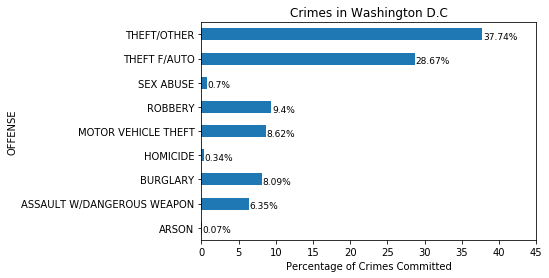

In [23]:
#Total Crimes
t_crimes=len(dc_crimes_df["CCN"].unique())
t_crimes

crime_rate = dc_crimes_df.groupby('OFFENSE')
crime_rate.count().head()
c_crime_rate=crime_rate.CCN.count()
print("Total number of Crimes for each category of offense\n")
print(c_crime_rate)
print("\n")
print("Percentage of Crimes for each category of offense\n")
p_crime_rate=(crime_rate.CCN.count()/t_crimes)*100
print(p_crime_rate)
t_crimes

#Offense Plot - Bar Graph
crime_rate_df=pd.DataFrame(p_crime_rate)
crime_rate_df
fig = crime_rate_df["CCN"].plot(kind="barh") 
summary_tuple=(0.07,6.35,8.09,0.34,8.62,9.4,0.7,28.67,37.74)

for i in range(len(summary_tuple)):
        value_x=summary_tuple[i]+0.1
        plt.text(x=value_x, y=i-0.2, s=(str(summary_tuple[i])+"%"), size=9,color="black")
        
plt.xlabel('Percentage of Crimes Committed')
plt.title("Crimes in Washington D.C")
plt.xlim(0,45)
plt.show()

The highest number of Incidents are in the category - THEFT/OTHER and THEFT F/AUTO

In [24]:
#Total Number of Crimes - By Year, Month, Day of the Week and District
year_count = dc_crimes_df.groupby(['YEAR'])['CCN'].count()
month_count = dc_crimes_df.groupby(['MONTH'])['CCN'].count()
month_count = month_count.reindex(index=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec'])
day_count = dc_crimes_df.groupby(['DAY_OF_WEEK'])['CCN'].count()
day_count = day_count.reindex(index=['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
district_count = dc_crimes_df.groupby(['DISTRICT'])['CCN'].count()

In [25]:
# Function to plot graphs
def vis_plot(var, xlabel, ylabel, title,image_name):
    path="Images/"+image_name
    sns.set(style="darkgrid")
    norm = plt.Normalize(0, var.values.max())
    colors = plt.cm.Reds(norm(var.values))
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(var.index, var.values, palette=colors)
    ax.set(ylabel=ylabel, xlabel=xlabel)
    plt.savefig(path)
    plt.title(title)
    plt.show()

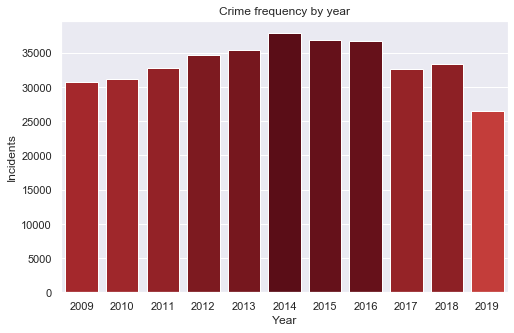

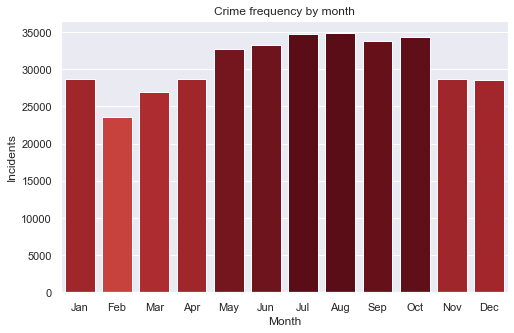

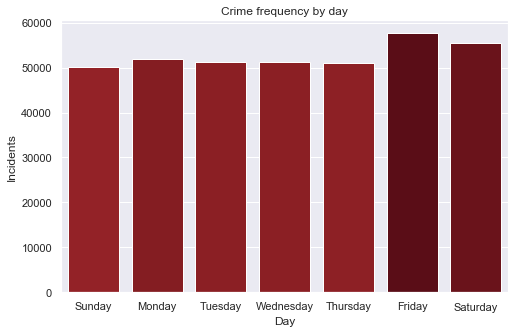

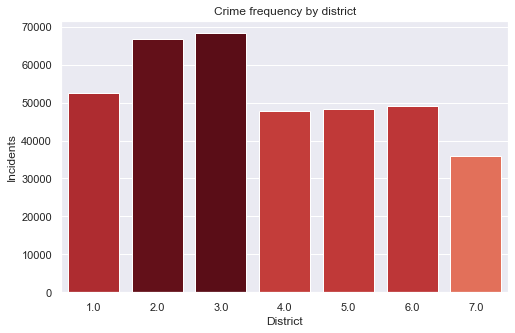

In [26]:
#Plotting graphs
vis_plot(year_count, 'Year', 'Incidents','Crime frequency by year','crimes_year.png')
vis_plot(month_count, 'Month', 'Incidents','Crime frequency by month','crimes_month.png')
vis_plot(day_count, 'Day', 'Incidents','Crime frequency by day','crimes_day.png')
vis_plot(district_count, 'District', 'Incidents','Crime frequency by district','crimes_district.png')

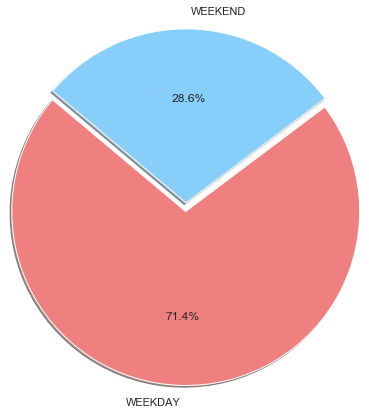

In [27]:
# Crimes by Weekend and Weekday
mon=dc_crimes_df.loc[dc_crimes_df["DAY_OF_WEEK"]=="Monday"].count()
tue=dc_crimes_df.loc[dc_crimes_df["DAY_OF_WEEK"]=="Tuesday"].count()
wed=dc_crimes_df.loc[dc_crimes_df["DAY_OF_WEEK"]=="Wednesday"].count()
thu=dc_crimes_df.loc[dc_crimes_df["DAY_OF_WEEK"]=="Thursday"].count()
fri=dc_crimes_df.loc[dc_crimes_df["DAY_OF_WEEK"]=="Friday"].count()
sat=dc_crimes_df.loc[dc_crimes_df["DAY_OF_WEEK"]=="Saturday"].count()
sun=dc_crimes_df.loc[dc_crimes_df["DAY_OF_WEEK"]=="Sunday"].count()
weekday=mon[0]+tue[0]+wed[0]+thu[0]+fri[0]
weekend=sat[0]+sun[0]

#Plot the pie chart for Number of crimes by SHifts
labels=["WEEKDAY","WEEKEND"]
values=[weekday,weekend]
colors=["lightcoral","lightskyblue"]
explode=(0,0.1)
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True,startangle=140,radius=2)
plt.savefig("Images/crimes_weekend_weekday.png")
plt.show()

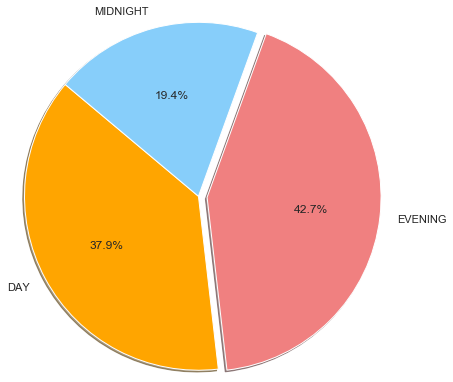

Percenatage of Crimes during the Day Shift: 37.93%
Percenatage of Crimes during the Evening Shift: 42.65%
Percenatage of Crimes during the Midnight Shift: 19.41%


In [28]:
#Total Crimes
t_crimes=len(dc_crimes_df["CCN"].unique())
t_crimes
shift_count = dc_crimes_df.groupby(['SHIFT'])['CCN'].count()
p_shift_count=(shift_count/t_crimes) *100
shift_df=pd.DataFrame(p_shift_count)
shift_df["CCN"] = shift_df["CCN"].map("{0:.2f}%".format)

#Plot the pie chart for Number of crimes by SHifts
labels=["DAY","EVENING","MIDNIGHT"]
colors=["orange","lightcoral","lightskyblue"]
explode=(0,0.1,0)
plt.pie(p_shift_count,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True,startangle=140,radius=2)
plt.savefig("Images/crimes_shift.png")
plt.show()

print("Percenatage of Crimes during the Day Shift:",shift_df["CCN"][0])
print("Percenatage of Crimes during the Evening Shift:",shift_df["CCN"][1])
print("Percenatage of Crimes during the Midnight Shift:",shift_df["CCN"][2])

In [29]:
# Analyzing if crimes happen during Day or Night
dc_crimes_df[['Start_Time','junk1','junk2']] = dc_crimes_df['Start_Time'].str.split(':',expand=True)
dc_crimes_df[['End_Time','junk3','junk4']] = dc_crimes_df['End_Time'].str.split(':',expand=True)
dc_crimes_df[['Report_Time','junk5','junk6']] = dc_crimes_df['Report_Time'].str.split(':',expand=True)
dc_crimes_df.drop(columns=['Dup_CCN','junk1','junk2','junk3','junk4','junk5','junk6'],inplace=True)
dc_crimes_df['Start_Time']=pd.to_numeric(dc_crimes_df['Start_Time'])

In [30]:
#All crimes from 7 a.m to 6 p.m are categorized as Day Crimes and crimes from 6 p.m to morning 7 a.m are categorized as Night Crimes
for i in range(0, 25):
    if (i>6 & i<=18):
        dc_crimes_df.loc[dc_crimes_df['Start_Time'] == i, 'Start_Time'] = "Day"
    else:
        dc_crimes_df.loc[dc_crimes_df['Start_Time'] == i, 'Start_Time'] = "Night"
dc_crimes_df['Start_Time'].unique()

time_count = dc_crimes_df.groupby(['Start_Time'])['CCN'].count()
print('Most crimes were committed during: ',time_count.idxmax())

Most crimes were committed during:  Day


In [31]:
#most frequent type of crime that is committed during the day
time_count2 = dc_crimes_df.loc[dc_crimes_df['Start_Time'] == 'Night'].groupby(['OFFENSE'])['CCN'].count()
print('Most frequent type of crime during the Night is', time_count2.idxmax())

Most frequent type of crime during the Night is THEFT F/AUTO


In [32]:
#most frequent type of crime that is committed during the day
time_count3 = dc_crimes_df.loc[dc_crimes_df['Start_Time'] == 'Day'].groupby(['OFFENSE'])['CCN'].count()
print('Most frequent type of crime during the Day is', time_count3.idxmax())

Most frequent type of crime during the Day is THEFT/OTHER


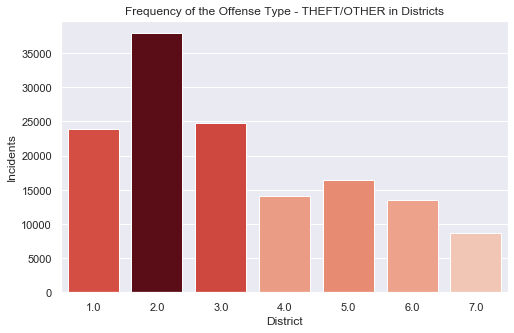

District with most Theft Crimes is District 2.0


In [33]:
#District with the most Theft crimes
theft_group = dc_crimes_df[dc_crimes_df['OFFENSE'] == 'THEFT/OTHER'].groupby(['DISTRICT'])['CCN'].count()
district=dc_crimes_df["DISTRICT"].unique()
vis_plot(theft_group, 'District', 'Incidents','Frequency of the Offense Type - THEFT/OTHER in Districts','theft_in_districts')
print('District with most Theft Crimes is District', theft_group.idxmax())

In [2]:
#Total Number of Crimes - By Year, Month, Day of the Week and District
year_count = dc_crimes_df.groupby(['YEAR'])['CCN'].count()
month_count = dc_crimes_df.groupby(['MONTH'])['CCN'].count()
month_count = month_count.reindex(index=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec'])
day_count = dc_crimes_df.groupby(['DAY_OF_WEEK'])['CCN'].count()
day_count = day_count.reindex(index=['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
week_count= dc_crimes_df.groupby(['WEEK_NUMBER'])['CCN'].count()

gun_year_count=dc_crimes_df[dc_crimes_df["METHOD"]=="GUN"].groupby('YEAR')['CCN'].count()
gun_month_count=dc_crimes_df[dc_crimes_df["METHOD"]=="GUN"].groupby('MONTH')['CCN'].count()
gun_month_count=gun_month_count.reindex(index=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec'])
gun_day_count=dc_crimes_df[dc_crimes_df["METHOD"]=="GUN"].groupby('DAY_OF_WEEK')['CCN'].count()
gun_day_count=gun_day_count.reindex(index=['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
gun_week_count=dc_crimes_df[dc_crimes_df["METHOD"]=="GUN"].groupby('WEEK_NUMBER')['CCN'].count()


hom_year_count=dc_crimes_df[dc_crimes_df["OFFENSE"]=="HOMICIDE"].groupby('YEAR')['CCN'].count()
hom_month_count=dc_crimes_df[dc_crimes_df["OFFENSE"]=="HOMICIDE"].groupby('MONTH')['CCN'].count()
hom_month_count=gun_month_count.reindex(index=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec'])
hom_day_count=dc_crimes_df[dc_crimes_df["OFFENSE"]=="HOMICIDE"].groupby('DAY_OF_WEEK')['CCN'].count()
hom_day_count=gun_day_count.reindex(index=['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
hom_week_count=dc_crimes_df[dc_crimes_df["OFFENSE"]=="HOMICIDE"].groupby('WEEK_NUMBER')['CCN'].count()



district_count = dc_crimes_df.groupby(['DISTRICT'])['CCN'].count()
ward_count = dc_crimes_df.groupby(['WARD'])['CCN'].count()
psa_count = dc_crimes_df.groupby(['PSA'])['CCN'].count()
neighborhood_count = dc_crimes_df.groupby(['NEIGHBORHOOD_CLUSTER'])['CCN'].count()


In [ ]:
# Function to plot graphs
def vis_plot(var, xlabel, ylabel, title,image_name):
    path="Images/"+image_name
    sns.set(style="darkgrid")
    norm = plt.Normalize(0, var.values.max())
    colors = plt.cm.Reds(norm(var.values))
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(var.index, var.values, palette=colors)
    ax.set(ylabel=ylabel, xlabel=xlabel)
    plt.savefig(path)
    plt.title(title)
    plt.show()

In [ ]:
#Plotting graphs
vis_plot(year_count, 'Year', 'Total Number of Crimes','Crime frequency by year','crimes_year.png')
vis_plot(month_count, 'Month', 'Total Number of Crimes','Crime frequency by month','crimes_month.png')
vis_plot(day_count, 'Day', 'Total Number of Crimes','Crime frequency by day','crimes_day.png')

vis_plot(district_count, 'District', 'Total Number of Crimes','Crime frequency by district','crimes_district.png')

vis_plot(gun_year_count, 'Year', 'Total Number of Gun Crimes','Gun crime frequency by year','gun_crimes_year.png')
vis_plot(gun_month_count, 'Month', 'Total Number of Gun Crimes','Gun crime frequency by month','gun_crimes_month.png')
vis_plot(gun_day_count, 'Day', 'Total Number of Gun Crimes','Gun crime frequency by day','gun_crimes_day.png')

vis_plot(hom_year_count, 'Year', 'Total Number of Homicides','Homicide frequency by year','hom_crimes_year.png')
vis_plot(hom_month_count, 'Month', 'Total Number of Homicides','Homicide frequency by month','hom_crimes_month.png')
vis_plot(hom_day_count, 'Day', 'Total Number of Homicides','Homicide frequency by day','hom_crimes_day.png')

#Most crime PSAs

dc_crimes_df.groupby(['PSA'])['CCN'].count().sort_values(ascending=False).head(10).plot.bar(title='Top 10 PSA by Crimes Reported',color="red",)
plt.ylabel("Total Number of Crimes")


In [ ]:
#Most crime wards

dc_crimes_df.groupby(['WARD'])['CCN'].count().sort_values(ascending=False).head(10).plot.bar(title='Top 10 Wards by Crimes Reported',color="red")
plt.ylabel("Total Number of Crimes")

#Most crime neighborhood cluster


dc_crimes_df.groupby(['NEIGHBORHOOD_CLUSTER'])['CCN'].count().sort_values(ascending=False).head(10).plot.bar(title='Top 10 Neighborhood Clusters by Crimes Reported',color="red")

plt.ylabel("Total Number of Crimes")

In [ ]:
#Top 

PSA_gun_count=dc_crimes_df[dc_crimes_df["METHOD"]=="GUN"].groupby('PSA')['CCN'].count().sort_values(ascending=False).head(10).plot.bar(title='Top 10 PSA by Gun Violence',color="red")

PSA_gun_count


ward_gun_count=dc_crimes_df[dc_crimes_df["METHOD"]=="GUN"].groupby('WARD')['CCN'].count().sort_values(ascending=False).head(10).plot.bar(title='Top 10 Wards by Gun Violence',color="red")
ward_gun_count

neighborhood_gun_count=dc_crimes_df[dc_crimes_df["METHOD"]=="GUN"].groupby('NEIGHBORHOOD_CLUSTER')['CCN'].count().sort_values(ascending=False).head(10).plot.bar(title='Top 10 Neighborhood Clusters by Gun Violence',color="red")
neighborhood_gun_count

district_gun_count=dc_crimes_df[dc_crimes_df["METHOD"]=="GUN"].groupby('DISTRICT')['CCN'].count().sort_values(ascending=False).plot.bar(title='Gun violence by District',color="red")
district_gun_count


PSA_hom_count=dc_crimes_df[dc_crimes_df["OFFENSE"]=="HOMICIDE"].groupby('PSA')['CCN'].count().sort_values(ascending=False).head(10).plot.bar(title='Top 10 PSA by Homicides',color="red")
PSA_hom_count


ward_hom_count=dc_crimes_df[dc_crimes_df["OFFENSE"]=="HOMICIDE"].groupby('WARD')['CCN'].count().sort_values(ascending=False).head(10).plot.bar(title='Top 10 Wards by Homicides',color="red")
ward_hom_count




neighborhood_hom_count=dc_crimes_df[dc_crimes_df["OFFENSE"]=="HOMICIDE"].groupby('NEIGHBORHOOD_CLUSTER')['CCN'].count().sort_values(ascending=False).head(10).plot.bar(title='Top 10 Neighborhood Clusters by Homicides',color="red")
neighborhood_hom_count

#Clearly the locations with the most crime reports were not neccessarily the ones with the most violent crime

In [ ]:
#Percentage of each offense type committed in the PSA with the most crime
topcrime208_df=pd.DataFrame(dc_crimes_df[dc_crimes_df["PSA"]==208.0])
arson=topcrime208_df.loc[topcrime208_df["OFFENSE"]=="ARSON"].count()
assault=topcrime208_df.loc[topcrime208_df["OFFENSE"]=="ASSAULT W/DANGEROUS WEAPON"].count()
burglary=topcrime208_df.loc[topcrime208_df["OFFENSE"]=="BURGLARY"].count()
homicide=topcrime208_df.loc[topcrime208_df["OFFENSE"]=="HOMICIDE"].count()
motor=topcrime208_df.loc[topcrime208_df["OFFENSE"]=="MOTOR VEHICLE THEFT"].count()
robbery=topcrime208_df.loc[topcrime208_df["OFFENSE"]=="ROBBERY"].count()
abuse=topcrime208_df.loc[topcrime208_df["OFFENSE"]=="SEX ABUSE"].count()
auto=topcrime208_df.loc[topcrime208_df["OFFENSE"]=="THEFT F/AUTO "].count()
others=topcrime208_df.loc[topcrime208_df["OFFENSE"]=="THEFT/OTHER"].count()


#arson= topcrime208_df.groupby("OFFENSE"=="ARSON".count()


In [ ]:
topcrime208_df
labels=["ARSON","ASSAULT W/DANGEROUS WEAPON","BURGLARY","HOMICIDE","MOTOR VEHICLE THEFT", "ROBBERY","SEX ABUSE", "THEFT F/AUTO","THEFT/OTHER"]
values=[arson[0],assault[0], burglary[0], homicide[0],motor[0],robbery[0],abuse[0], auto[0],others[0]]
colors= ["red","darkred","lightblue","darkblue","green","lightgreen","magenta","violet","lightgrey"]

plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True,startangle=140,radius=7)
plt.savefig("Images/208.png")
plt.show()

topcrime208_dd=pd.DataFrame(dc_crimes_df[dc_crimes_df["PSA"]==208.0]).groupby('OFFENSE')['CCN'].count()
topcrime208_dd

#Homicide is not an issue in PSA 208. Theft is a far greater problem.
#PSA 208 is pretty safe. Crime in PSAs with greater homicide must be underreported

In [ ]:
#Percentage of crimes by method

gun=dc_crimes_df.loc[dc_crimes_df["METHOD"]=="GUN"].count()
knife=dc_crimes_df.loc[dc_crimes_df["METHOD"]=="KNIFE"].count()
other=dc_crimes_df.loc[dc_crimes_df["METHOD"]=="OTHERS"].count()

labels=["GUN","KNIFE","OTHERS"]
values=[gun[0],knife[0],other[0]]
colors=["red","green","lightblue"]
plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True,startangle=140,radius=2)
plt.savefig("Images/method.png")
plt.show()

In [34]:
# Analyzing the trends

In [35]:
#THEFT/OTHER                   141605
#THEFT F/AUTO                  106850
#ROBBERY                        35171
#MOTOR VEHICLE THEFT            32388
#BURGLARY                       30229
#ASSAULT W/DANGEROUS WEAPON     23757
#SEX ABUSE                       2750
#HOMICIDE                        1374
#ARSON                            279
#dc_crimes_df.columns

In [36]:
# gather yearly count based on Offenses
o_theft = dc_crimes_df[dc_crimes_df["OFFENSE"]=="THEFT/OTHER"]
o_theft_yearly= o_theft["YEAR"].value_counts(sort=False)

a_theft = dc_crimes_df[dc_crimes_df["OFFENSE"]=="THEFT F/AUTO"]
a_theft_yearly= a_theft["YEAR"].value_counts(sort=False)

robbery = dc_crimes_df[dc_crimes_df["OFFENSE"]=="ROBBERY"]
robbery_yearly= robbery["YEAR"].value_counts(sort=False)

mv_theft = dc_crimes_df[dc_crimes_df["OFFENSE"]=="MOTOR VEHICLE THEFT"]
mv_theft_yearly= mv_theft["YEAR"].value_counts(sort=False)

burglary = dc_crimes_df[dc_crimes_df["OFFENSE"]=="BURGLARY"]
burglary_yearly= burglary["YEAR"].value_counts(sort=False)

assault = dc_crimes_df[dc_crimes_df["OFFENSE"]=="ASSAULT W/DANGEROUS WEAPON"]
assault_yearly= assault["YEAR"].value_counts(sort=False)

s_abuse = dc_crimes_df[dc_crimes_df["OFFENSE"]=="SEX ABUSE"]
s_abuse_yearly= s_abuse["YEAR"].value_counts(sort=False)

homicide = dc_crimes_df[dc_crimes_df["OFFENSE"]=="HOMICIDE"]
homicide_yearly= homicide["YEAR"].value_counts(sort=False)

arson = dc_crimes_df[dc_crimes_df["OFFENSE"]=="ARSON"]
arson_yearly= arson["YEAR"].value_counts(sort=False)


In [37]:
# indexes by offense types
o_theft_index = o_theft_yearly.index.tolist()
o_theft_index.sort()

a_theft_index = a_theft_yearly.index.tolist()
a_theft_index.sort()

robbery_index = robbery_yearly.index.tolist()
robbery_index.sort()

mv_theft_index = mv_theft_yearly.index.tolist()
mv_theft_index.sort()

burglary_index = burglary_yearly.index.tolist()
burglary_index.sort()

assault_index = assault_yearly.index.tolist()
assault_index.sort()

s_abuse_index = s_abuse_yearly.index.tolist()
s_abuse_index.sort()

homicide_index = homicide_yearly.index.tolist()
homicide_index.sort()

arson_index = arson_yearly.index.tolist()
arson_index.sort()

In [38]:
# Calculate the trendlines

tl_o_theft = np.polyfit(o_theft_index, o_theft_yearly, 1)
p1=np.poly1d(tl_o_theft)

tl_a_theft =np.polyfit(a_theft_index, a_theft_yearly, 1)
p2=np.poly1d(tl_a_theft)

tl_robbery= np.polyfit(robbery_index, robbery_yearly, 1)
p3=np.poly1d(tl_robbery)

tl_mv_theft = np.polyfit(mv_theft_index, mv_theft_yearly, 1)
p4=np.poly1d(tl_mv_theft)

tl_burglary= np.polyfit(burglary_index, burglary_yearly, 1)
p5=np.poly1d(tl_burglary)

tl_assault= np.polyfit(assault_index, assault_yearly, 1)
p6=np.poly1d(tl_assault)

tl_s_abuse= np.polyfit(s_abuse_index, s_abuse_yearly, 1)
p7=np.poly1d(tl_s_abuse)

tl_homicide = np.polyfit(homicide_index, homicide_yearly, 1)
p8=np.poly1d(tl_homicide)

tl_arson= np.polyfit(arson_index, arson_yearly, 1)
p9=np.poly1d(tl_arson)

In [39]:
# Function to plot trend graph
def vis_plot1(var1, var2,var3,var_label, title,image_name):
    plt.plot(var1, var2, label = var_label,) 
    plt.plot(var1,var3,"r--",label="trend")
    path="Images/"+image_name
    plt.xlabel('Year')
    plt.ylabel('Number of Incidents')
    plt.title(title) 
    plt.legend()
    plt.xticks(o_theft_index, rotation='vertical')
    plt.savefig(path)
    plt.show()

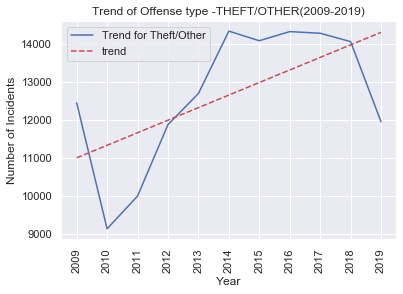

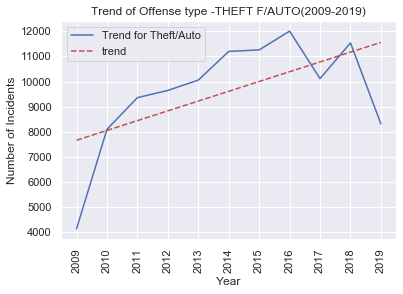

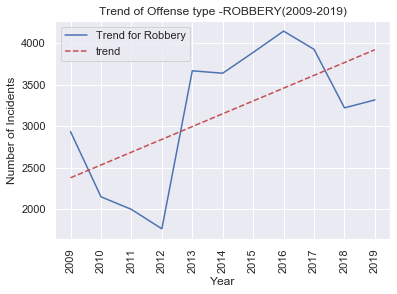

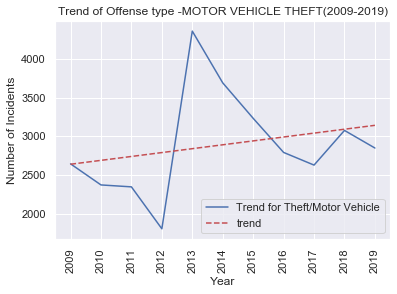

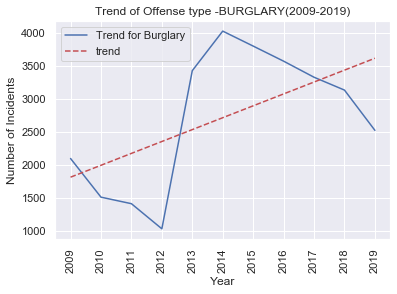

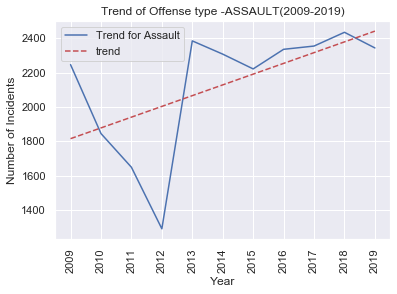

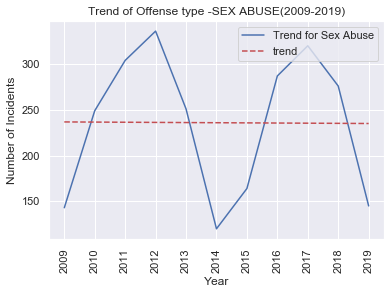

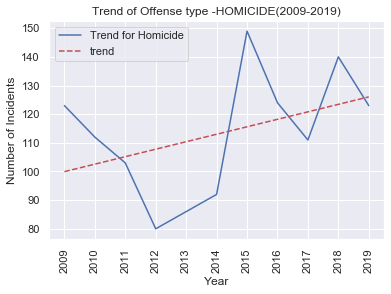

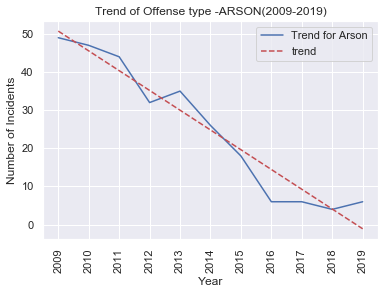

In [40]:
#Call the function to plot trends

vis_plot1(o_theft_index,o_theft_yearly,p1(o_theft_index), 
          'Trend for Theft/Other','Trend of Offense type -THEFT/OTHER(2009-2019)','trend_theft_other.png')

vis_plot1(a_theft_index,a_theft_yearly,p2(a_theft_index), 
          'Trend for Theft/Auto','Trend of Offense type -THEFT F/AUTO(2009-2019)','trend_theft_auto.png')

vis_plot1(robbery_index,robbery_yearly,p3(robbery_index), 
          'Trend for Robbery','Trend of Offense type -ROBBERY(2009-2019)','trend_robbery.png')

vis_plot1(mv_theft_index,mv_theft_yearly,p4(mv_theft_index), 
          'Trend for Theft/Motor Vehicle','Trend of Offense type -MOTOR VEHICLE THEFT(2009-2019)','trend_theft_vehicle.png')

vis_plot1(burglary_index,burglary_yearly,p5(burglary_index), 
         'Trend for Burglary','Trend of Offense type -BURGLARY(2009-2019)','trend_burglary.png')

vis_plot1(assault_index,assault_yearly,p6(assault_index), 
          'Trend for Assault','Trend of Offense type -ASSAULT(2009-2019)','trend_assault.png')

vis_plot1(s_abuse_index,s_abuse_yearly,p7(s_abuse_index), 
          'Trend for Sex Abuse','Trend of Offense type -SEX ABUSE(2009-2019)','trend_abuse.png')

vis_plot1(homicide_index,homicide_yearly,p8(homicide_index), 
          'Trend for Homicide','Trend of Offense type -HOMICIDE(2009-2019)','trend_homicide.png')

vis_plot1(arson_index,arson_yearly,p9(arson_index), 
          'Trend for Arson','Trend of Offense type -ARSON(2009-2019)','trend_arson.png')

In [41]:
copy_df=dc_crimes_df.copy()
copy_df[['BLOCK','Street_Name']] = dc_crimes_df['BLOCK'].str.split('BLOCK OF ',expand=True)
#copy_df[['BLOCK','Street_Name']].head(2)

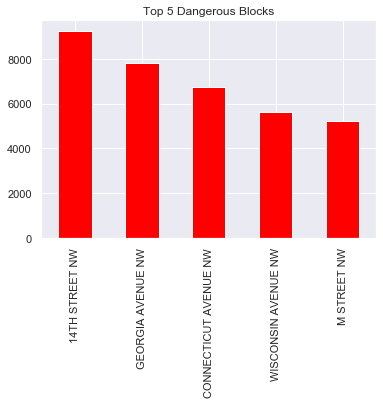

In [42]:
copy_df["Street_Name"].value_counts()[:5].plot.bar(title='Top 5 Dangerous Blocks',color="red")
plt.savefig("Images/dangerous_streets.png")
plt.show()

In [43]:
#Time to report a crime - Aging
dc_crimes_df['TIME_TO_REPORT'] = (dc_crimes_df['REPORT_DAT'] - dc_crimes_df['START_DATE'])
var_age=dc_crimes_df['TIME_TO_REPORT'].mean()
print(f"The average time it takes to report a crime is: {var_age}")

The average time it takes to report a crime is: 2 days 16:43:23.149772


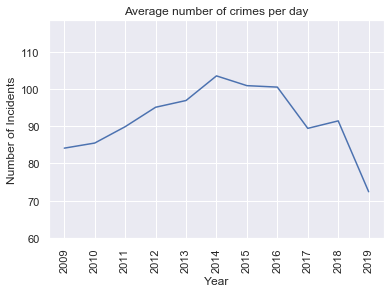

In [44]:
#Average number of crimes per day throughout the years

#Taking the average per day for each year
avg_day_crime = dc_crimes_df['YEAR'].value_counts(sort=False)/365
avg_day_crime

#Getting the indexes for the plot
avg_crime_index = avg_day_crime.index.tolist()
avg_crime_index.sort()

#Plotting line chart
plt.plot(avg_crime_index,avg_day_crime)
path="Images/"+"avg_crime_day"
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Average number of crimes per day') 
plt.xticks(avg_crime_index, rotation='vertical')
plt.ylim(60, max(avg_day_crime)+15)
plt.savefig(path)
plt.show()


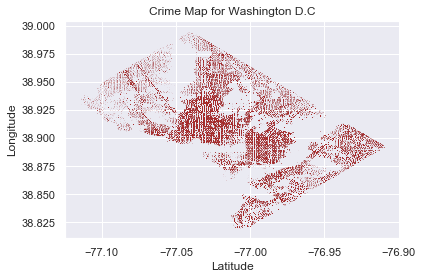

In [45]:
#Crime Map
plt.scatter(dc_crimes_df['LONGITUDE'], dc_crimes_df['LATITUDE'], s=0.1, alpha=0.3, color="brown", lw=0)
plt.savefig("Images/density.png")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Crime Map for Washington D.C")
plt.show()

In [46]:
#Export the city data into a .csv. -"Should be the final step"
dc_crimes_df.to_csv("../dc_crimes_final_file.csv",index=False,header=True,encoding='utf-8-sig')
#encoding also exports any non-english data